In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
# nn是神经网络的缩写
from torch import nn
from torch.utils import data
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # https://blog.51cto.com/u_15057807/4403590 有一个文件重复的问题

# 更加简洁的实现
生成数据，实际问题中数据可能是从一些数据集里读取的，也可能需要我们经过一些清洗


In [9]:
def synthetic_data(w, b, num_examples):  # @save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.8185, 0.3014]) 
label: tensor([4.8160])


> features 是一个tensor

features[:,0] # 只取第0维的向量
features[:,1] # 只取第1维的向量

tensor.detach()

> detach()

从计算图中脱离出来。

> detach()的官方说明如下：
Returns a new Tensor, detached from the current graph. The result will never require gradient.

.numpy()
将张量转换为与其共享底层存储的 n 维 numpy 数组

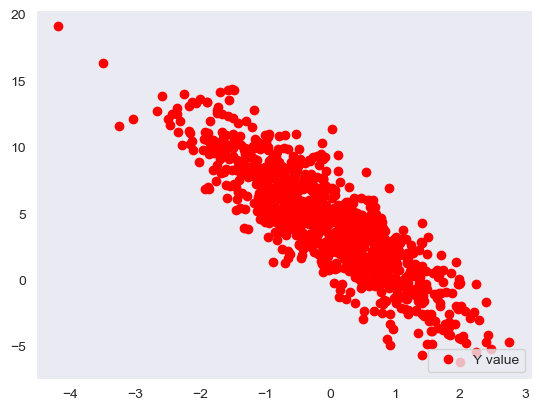

In [58]:
# 只是取了其中一个变量来 宏观额看关系
plt.plot(features[:, 1].detach().numpy(), labels.detach().numpy(), 'ro', label='Y value')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## 线性回归 pytorch
* 定义神经网络
* 定义损失函数
* 定义优化器
* 运行batch

使用data_iter的方式与我们在 :numref:sec_linear_scratch中使用data_iter函数的方式相同。为了验证是否正常工作，让我们读取并打印第一个小批量样本。
 与 :numref:sec_linear_scratch不同，这里我们使用iter构造Python迭代器，并使用next从迭代器中获取第一项。

代码中batch_size == 10 ,就是从feature ,labels 里面 一次取10个。

In [59]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """
    构造一个PyTorch数据迭代器
    """
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train) # 数据加载器
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.8534,  1.4222],
         [ 1.4419, -0.2020],
         [-0.0401,  0.2890],
         [-0.9539,  0.3509],
         [-0.4187, -0.9929],
         [ 1.4021, -1.5702],
         [ 0.3018,  1.7049],
         [-0.7192,  2.0457],
         [-0.7117,  0.4898],
         [-0.4806,  0.5463]]),
 tensor([[ 1.0758],
         [ 7.7889],
         [ 3.1351],
         [ 1.0855],
         [ 6.7430],
         [12.3495],
         [-0.9882],
         [-4.2064],
         [ 1.1095],
         [ 1.3775]])]

## 定义一层的线性模型

In [60]:
net = nn.Sequential(nn.Linear(2, 1))# 参数int: in_features , int: out_features,输入w，b 得到Y

(初始化模型参数)
在使用net之前，我们需要初始化模型参数。 如在线性回归模型中的权重和偏置。 深度学习框架通常有预定义的方法来初始化参数。 在这里，我们指定每个权重参数应该从均值为0、标准差为0.01的正态分布中随机采样， 偏置参数将初始化为零。

正如我们在构造nn.Linear时指定输入和输出尺寸一样， 现在我们能直接访问参数以设定它们的初始值。
我们通过net[0]选择网络中的第一个图层， 然后使用weight.data和bias.data方法访问参数。 我们还可以使用替换方法normal_和fill_来重写参数值。


In [61]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

定义损失函数
计算均方误差使用的是MSELoss类，也称为平方 $L_2$ 范数, 默认情况下，它返回所有样本损失的平均值。
[MSELoss ](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)

In [62]:
loss = nn.MSELoss()

定义损失函数

In [63]:
## SGD 随机梯度先下降 学习率 0.03
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [81]:
num_epochs = 3
loss_list = []
i = 0
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
       # # 从图里看得出来 很快就收敛了，得到了想要的 w 和 bprint("第%d次",i)
       # i=i+1
    l = w = net[0].weight.data
    print('w的估计误差：', true_w - w.reshape(true_w.shape))

第%d次 0
第%d次 1
第%d次 2
第%d次 3
第%d次 4
第%d次 5
第%d次 6
第%d次 7
第%d次 8
第%d次 9
第%d次 10
第%d次 11
第%d次 12
第%d次 13
第%d次 14
第%d次 15
第%d次 16
第%d次 17
第%d次 18
第%d次 19
第%d次 20
第%d次 21
第%d次 22
第%d次 23
第%d次 24
第%d次 25
第%d次 26
第%d次 27
第%d次 28
第%d次 29
第%d次 30
第%d次 31
第%d次 32
第%d次 33
第%d次 34
第%d次 35
第%d次 36
第%d次 37
第%d次 38
第%d次 39
第%d次 40
第%d次 41
第%d次 42
第%d次 43
第%d次 44
第%d次 45
第%d次 46
第%d次 47
第%d次 48
第%d次 49
第%d次 50
第%d次 51
第%d次 52
第%d次 53
第%d次 54
第%d次 55
第%d次 56
第%d次 57
第%d次 58
第%d次 59
第%d次 60
第%d次 61
第%d次 62
第%d次 63
第%d次 64
第%d次 65
第%d次 66
第%d次 67
第%d次 68
第%d次 69
第%d次 70
第%d次 71
第%d次 72
第%d次 73
第%d次 74
第%d次 75
第%d次 76
第%d次 77
第%d次 78
第%d次 79
第%d次 80
第%d次 81
第%d次 82
第%d次 83
第%d次 84
第%d次 85
第%d次 86
第%d次 87
第%d次 88
第%d次 89
第%d次 90
第%d次 91
第%d次 92
第%d次 93
第%d次 94
第%d次 95
第%d次 96
第%d次 97
第%d次 98
第%d次 99
w的估计误差： tensor([ 0.0009, -0.0001])


In [77]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([7.7081e-04, 4.5300e-05])
b的估计误差： tensor([0.0005])


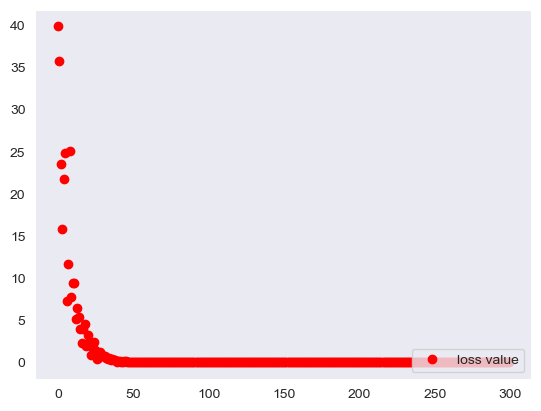

In [78]:
# 从图里看得出来 很快就收敛了，得到了想要的 w 和 b
plt.plot(loss_list, 'ro', label='loss value')
plt.legend(loc='lower right')
plt.grid()
plt.show()